In [ ]:
#マウント
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
##作業するディレクトリを指定する.
%cd '/content/drive/MyDrive/Colab_Notebooks/paper'

/content/drive/MyDrive/Colab_Notebooks/paper


In [ ]:
#関係するツールの導入
from bs4 import BeautifulSoup
import urllib
import urllib.request as req
import time
import requests
import os
import numpy as np
import pandas as pd
import collections
import re
import math
import matplotlib.pyplot as plt

In [ ]:
#input_folder_path: 入力となるファイルの保存場所
input_folder_path = '/content/drive/MyDrive/Colab_Notebooks/paper/paper_step3_test'
#output_folder_path: 出力となるpdfファイルの保存場所
output_folder_path = '/content/drive/MyDrive/Colab_Notebooks/paper/paper_step4_test'

In [ ]:
#read_file_names_list (str)-> str_lst
#("入力の場所(フォルダまでのパス)")->"入力の場所"にあるファイル名を入れたstring型のlistを返す
#
#"入力の場所"はあるフォルダへのパス.
#フォルダの中にあるファイルの名前を読み込む.
#ファイルの名前をリストに入れていく.
#ファイルの名前を入れたリストを出力として返す.
#
#例
#"/file"->["folder_1.txt","folder_2.txt","folder_3.txt"]
#
# read_file_names_list(input_path)
#
#param string input_path 読み込みファイルが存在するフォルダパス
#
#return string[] 分割されたファイル名のリスト
#

def read_file_names_list(input_path):
  files_list = []
  for filename in os.listdir(input_path):
    if os.path.isfile(os.path.join(input_path, filename)): #ファイルのみ取得
      files_list.append(filename)
  return(files_list)

In [ ]:
file_names_list = read_file_names_list(input_folder_path)

In [ ]:
file_names_list

['Convergence_of_random_series_and_the_rate_ofconvergence_of_the_strong_law_of_large_numbers_ingame-theoretic_probability_miyabe_kenshi.txt',
 'L1-computability_layerwise_computability_and_Solovay_reducibility_Kenshi_Miyabe.txt',
 'VAN_LAMBALGEN’S_THEOREM_FOR_UNIFORMLY.txt',
 'Existence_of_a_ground_state_and_scattering_for_a_nonlinear.txt']

In [ ]:
#count_words_from_txt_file (str,str)-> str_lst
#("入力の場所(フォルダまでのパス)",ファイルの名前)->ファイルに保存されているtxtに含まれている単語をkey, その単語の出現回数をvalueとしたdic型を返す.
#
#"入力の場所"はあるフォルダへのパス.
#"入力の場所"+ファイルの名前で指定したファイルを読み込む.
#区切り文字の"\n"を","へ変更する.
#.split で単語を取り出す.
#単語とその単語の出現回数を取り出す.
#key は単語, value はその単語の出現回数とした
#dict型で出力する.
#
#例
#("/file", "foler_1.txt")->{"a": 1,"int": 3}
#
#count_words_from_txt_file(input_path,input_file_name)
#
#param string input_path 読み込みファイルが存在するフォルダパス
#param string input_file_name 読み込みするファイルの名前
#
#return dict{key = string: value = int} ファイルに保存されているtxtに含まれている単語をkey, その単語の出現回数をvalueとしたdic型
#

def count_words_from_txt_file (input_path,input_file_name):
  file_path = input_path + "/" + input_file_name
  f = open(file_path,"r")
  dic = {}
  for line in f:
    # 区切り文字の変更: スペース => カンマ
    line_1 = line.rstrip("\n")
    key, val = line_1.split(", ") 
    dic[key] = int(val)
  f.close()
  return(dic)

In [ ]:
#word_number_dictionarys_list: dict_list
#
#各ファイルごとの単語とその単語数を入れたdict型のリスト
#key: string 単語
#value: int key(単語)の出現回数
#
word_number_dictionarys_list =list(map( lambda x : count_words_from_txt_file (input_folder_path,x), file_names_list))

In [ ]:
#word_number_dictionarys_list[0]

In [ ]:
#各ファイルに含まれている単語の数
sum_word_numbers = list(map( lambda x : sum (x.values()), word_number_dictionarys_list))

In [ ]:
#word_number_dictionarys_list[0]
#sum_word_numbers

input_dictにact_dictを使って関数funを施して1つのdictを返す.

In [ ]:
#dict_fun(fun, input_dict, act_dict,param_none )) -> dict
#
#
#例
#( f, dict_input={ key1: value1, key2: value2,...},act_dict) ={ key_1: value_1, key_2: value_2,...}) -> { key1:fun(value1,value_1'), key2:fun(value2,value_2'), ... }
#value_i' :　act_dict)でのkeyiのvalue.
#
#input_dictにあってact_dictにないkeyはないものとして扱っている.
#もしその場合はact_dictのvalueが param_none で呼び出されて関数に入力される.
#
#param fun : 施したい関数 fun:(dict,dict) -> dict
#param dict input_dict : valueにfunを施して返したいdict
#param dict act_dict) : 関数funに使いたいdict
#param param_none : act_dictのvalueがない場合 param_none で呼び出されて関数に入力される.
#
##return dict valueにfunを施した後のinput_dict
#

def dict_fun(fun, input_dict, act_dict,param_none ):
  output_dict = {k: fun(input_dict.get(k,param_none),act_dict.get(k,param_none) ) for k in input_dict.keys()}
  return output_dict

In [ ]:
#test
#先頭の方に
is_debug = True

if is_debug :
  input_dict_test = {"a":1, "b":3, "c":0, "d":0 }
  act_dict_test = {"a":1, "b":4, "c":1 }
  def func_test (a,b):
    c = a + b
    return (c) 
  dict_fun( func_test, input_dict_test, act_dict_test ,0 )
  #dict_fun( func_test, input_dict_test, act_dict_test ,None )
#Noneはエラーが出て正解.

{'a': 2, 'b': 7, 'c': 1, 'd': 0}

dictを並び替えて上位n個をdictとして返す.

In [ ]:
#select_top_n_from_sorted_dict (int,input_dict)-> (key, value)_lst
#(取りだすitemesの数,dict型のもの)->入力のdictを昇順に並び替えて上位のn個を(key,value)のlistに保存する.
#
#入力したdict型(input_dict)を降順にsortする
#並び替えたdictから上位n個のkeyとvalueを取り出す.
#(key, value)としてlistに入れていく.
#(key, value)のリストを出力する.
#
#例
#(2, {"a": 1, "int": 3,"word":2 }) -> [("int", 3), ("word", 2)]
#
#param int n  とりだすitemの数
#param dict input_dict 並び替える辞書
#
##return (key,value)[] dicをvalueでsortした上位n個のkeyとvalueを(key, value)の組として入れていったlist

def select_top_n_from_sorted_dict (n,dct):
  dct_lst = sorted(dct.items(), key=lambda x:x[1], reverse=True)
  dct_lst_top = dct_lst[0:(n)]
  print(dct_lst_top)

すべてのtxtファイルに出現する単語の出現頻度を出す.

In [ ]:
#merge_dict_values: (dict,dict) -> dict
#dictとdictを足す.keyに対するvalueはd1とd2を足したもの.
#d1は上書きされる.
#
#param dict d1 : 足すdictionary
#param dict d2 : 足すdictionary
#
#return dict: d1のvalueとd2のvalueを足した

from collections import Counter

def merge_dict_values(d1,d2):
  return dict(Counter(d1) + Counter(d2))

In [ ]:
#すべてのファイルに出てくる単語の出現回数.
word_number_all_files_dictionary = {}
for i in range(len(word_number_dictionarys_list)):
  word_number_all_files_dictionary = merge_dict_values(word_number_all_files_dictionary,word_number_dictionarys_list[i])

In [ ]:
#test1
print(word_number_all_files_dictionary["the"])
print(word_number_dictionarys_list[0]["the"])
print(word_number_dictionarys_list[1]["the"])
print(word_number_dictionarys_list[2]["the"])
print(word_number_dictionarys_list[3]["the"])
322+179+215+364

1080
322
179
215
364


1080

In [ ]:
#test
print(word_number_all_files_dictionary["th"])
print(word_number_dictionarys_list[0].get("th"))
print(word_number_dictionarys_list[1].get("th"))
print(word_number_dictionarys_list[2].get("th"))
print(word_number_dictionarys_list[3].get("th"))

7
1
None
1
5


In [ ]:
#dict_frec(input_dict) -> dict
#
#input_dictのvalueの合計が1となるようにする.
#input_dictのvalueの値をすべて足す.
#各valueの値をその合計値で割る.
#計算を施した後のdictionaryを返す.
#
#例
#( {"a": 1, "int": 2,"word":2 }) -> {"a": 0.2, "int": 0.4,"word":0.4 }
#
#param dict input_dict 並び替える辞書
#
##return dict 入力のdictionaryのvalueの和が1となるようにしたdictionary
#
def dict_freq (input_dict):
  sum_value = sum(input_dict.values())
  r_dict = { k : v/sum_value for k ,v in input_dict.items()}
  return(r_dict)

In [ ]:
#すべてのファイルに出てくる単語の出現頻度.
word_freq_all_files_dictionary = dict_freq (word_number_all_files_dictionary)

In [ ]:
#test
print(word_number_all_files_dictionary["the"]/sum(word_number_all_files_dictionary.values()))
print(word_freq_all_files_dictionary["the"])

0.02592477015770902
0.02592477015770902


単語の数

In [ ]:
list(map( lambda x : select_top_n_from_sorted_dict  (5,x),word_number_dictionarys_list))

[('t', 655), ('x', 564), ('the', 322), ('n', 292), ('f', 264)]
[('x', 307), ('a', 276), ('is', 264), ('of', 201), ('and', 187)]
[('a', 357), ('is', 285), ('cid', 227), ('the', 215), ('to', 168)]
[('cid', 2234), ('n', 663), ('d', 629), ('i', 453), ('t', 442)]


[None, None, None, None]

各ファイルを見たときの各単語の出現割合

In [ ]:
#各ファイルごとに単語の頻度を出してlistにまとめたもの
word_freq_dictionarys_list =list(map( lambda x : dict_frec(x),word_number_dictionarys_list))

In [ ]:
#word_freq_dictionarys_listのvalueの和を出したときに約1となるかどうかの確認
#sum(word_freq_dictionarys_list[3].values())

In [ ]:
list(map( lambda x : select_top_n_from_sorted_dict (5,x),word_freq_dictionarys_list))

[('t', 0.061874173436614395), ('x', 0.053277914226336674), ('the', 0.03041753259021349), ('n', 0.027583600982429624), ('f', 0.024938598148498015)]
[('x', 0.04094971321862078), ('a', 0.03681472589035614), ('is', 0.035214085634253704), ('of', 0.026810724289715888), ('and', 0.024943310657596373)]
[('a', 0.048737201365187714), ('is', 0.03890784982935153), ('cid', 0.03098976109215017), ('the', 0.029351535836177476), ('to', 0.022935153583617748)]
[('cid', 0.13746846347917052), ('n', 0.0407974893852686), ('d', 0.03870531044243431), ('i', 0.027875207679527413), ('t', 0.027198326256845734)]


[None, None, None, None]

全体との割合の差

In [ ]:
word_freq_pull_dictionarys_list = list(map( lambda x : dict_fun(lambda a,b : a - b, x, word_freq_all_files_dictionary,None),word_freq_dictionarys_list))

In [ ]:
#test
print(word_freq_dictionarys_list[0]["the"]-word_freq_all_files_dictionary["the"])
print(word_freq_pull_dictionarys_list[0]["the"])

0.004492762432504471
0.004492762432504471


In [ ]:
list(map( lambda x : select_top_n_from_sorted_dict (5,x),word_freq_pull_dictionarys_list))

[('t', 0.0310284978323032), ('x', 0.024616640551980592), ('α', 0.016191813603168313), ('v', 0.011708638424988807), ('f', 0.011160062898011925)]
[('computable', 0.01701614417581046), ('is', 0.015794512432784635), ('x', 0.012288439544264698), ('of', 0.010295685522582736), ('a', 0.009425686307072818)]
[('a', 0.02134816178190439), ('is', 0.019488276627882464), ('schnorr', 0.013573634203983637), ('to', 0.012877302939099156), ('relative', 0.009692731175846936)]
[('cid', 0.07776947886600169), ('d', 0.01988584766128258), ('i', 0.014528751931669807), ('n', 0.010599933034900134), ('j', 0.010393207901296851)]


[None, None, None, None]

全体との割合の比

In [ ]:
word_freq_divide_dictionarys_list = list(map( lambda x : dict_fun(lambda a,b : a / b, x, word_freq_all_files_dictionary,None),word_freq_dictionarys_list))

In [ ]:
list(map( lambda x : select_top_n_from_sorted_dict (5,x),word_freq_divide_dictionarys_list))

[('available', 3.9352918949556024), ('online', 3.9352918949556024), ('www', 3.9352918949556024), ('sciencedirect', 3.9352918949556024), ('locate', 3.9352918949556024)]
[('ios', 5.556756035747632), ('research', 5.556756035747632), ('institute', 5.556756035747632), ('sciences', 5.556756035747632), ('kitashirakawa', 5.556756035747632)]
[('lambalgen', 5.687235494880547), ('correct', 5.687235494880547), ('truth', 5.687235494880547), ('table', 5.687235494880547), ('claimed', 5.687235494880547)]
[('scattering', 2.5634730170451054), ('energy', 2.5634730170451054), ('conditions', 2.5634730170451054), ('put', 2.5634730170451054), ('imax', 2.5634730170451054)]


[None, None, None, None]

In [ ]:
#test
print(word_freq_dictionarys_list[0]["the"]/word_freq_all_files_dictionary["the"])
print(word_freq_divide_dictionarys_list[0]["the"])

1.1732999909034294
1.1732999909034294


##図を描いてみる

In [ ]:
#make_graph (n,m,data_x,data_y,data_sub)-> graf
#
#dictionaryの値をx, data_yの値をyとしたグラフをつくる.
#
#出力はx=0.03, y=0.03までのグラフになる.
#
#param float n
#param float m
#param dict data_x 
#param dict data_y 
#param dict data_sub
#param float x_lim　グラフのx軸の最大値
#param float y_lim　グラフのy軸の最大値
#param ( int(float), int(float) ) fig_size グラフのサイズ
#
#return 図(グラフ)
def make_graph (n,m,data_x,data_y,data_sub,x_lim,y_lim,fig_size):
  dict_1 = {k: v for k, v in data_x.items() if v >= n}
  dict_2 = {k: v for k, v in data_sub.items() if v >= m}
  word_box = dict_1.keys() & dict_2.keys()
  plt.figure(figsize=fig_size)
  plt.xlim(0.0,x_lim)
  plt.ylim(0.0,y_lim)
  for key in word_box:
    x = data_x.get(key,0)
    y = data_y.get(key,0)
    plt.annotate(key,(x,y))
  plt.show()

##ファイル0

In [ ]:
#test_data_2_1_sorted = sorted(test_data_2_1.items(), key=lambda x:x[1], reverse=True)
#test_data_4_1_sorted = sorted(test_data_4_1.items(), key=lambda x:x[1], reverse=True)
#word_box = ["the","and","of","algorithmic","randomness","computable","anlaysis","l1","computability"," layerwise","solovay"]
#word_box_1 = list(map(lambda x: x[0], test_data_4_0_sorted[0:99])) 
#x = list(map(lambda key: top_dictionary.get(key,0), word_box)) 
#y = list(map(lambda key: test_data_4[1].get(key,0), word_box))
test_data_x = {k: v for k, v in word_freq_all_files_dictionary.items() if v >= 0.003}
test_data_y = {k: v for k, v in word_freq_divide_dictionarys_list[0].items() if v >= 1.17}
word_box = test_data_x.keys() & test_data_y.keys()

1つのファイルの単語の頻度をx,全体のファイルの頻度をyとする.

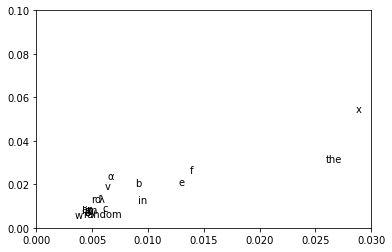

In [ ]:
plt.xlim(0.0,0.03)
plt.ylim(0.0,0.1)
for key in word_box:
  x = word_freq_all_files_dictionary.get(key,0)
  y = word_freq_dictionarys_list[0].get(key,0)
  plt.annotate(key,(x,y))
plt.show()

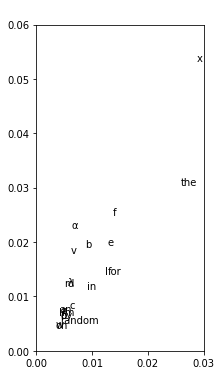

In [ ]:
 make_graph (0.003,1.10,word_freq_all_files_dictionary,word_freq_dictionarys_list[0],word_freq_divide_dictionarys_list[0], 0.03, 0.06, (3,6))